# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [2]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# Your code here...
# Add the target column to the DataFrame
iris_df['target'] = iris_data.target

# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(iris_df.head())

# Display the number of rows and columns
num_rows, num_columns = iris_df.shape
print(f"\nNumber of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_columns}")

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
First few rows of the Iris dataset:
   s

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


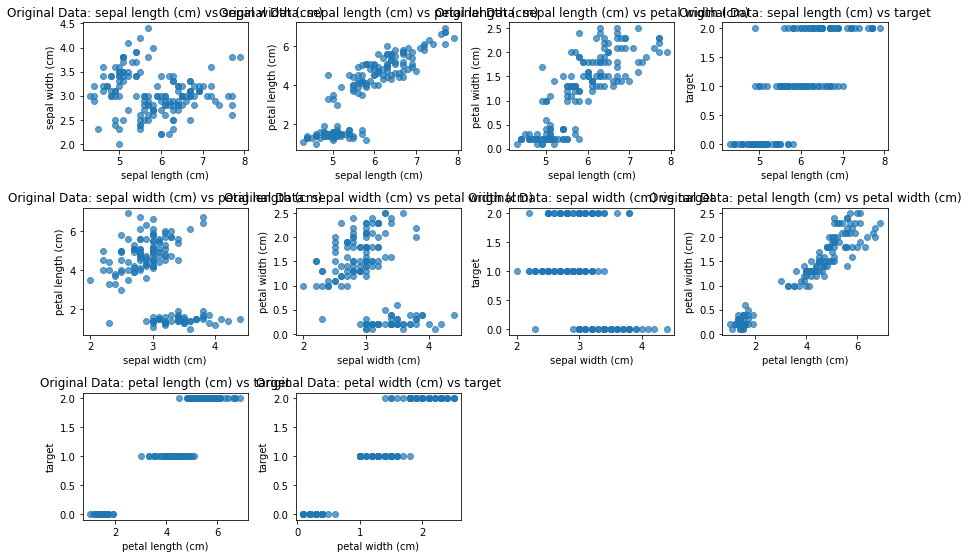

In [3]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> Upon plotting the scatter plots for all feature pairs, a few patterns and relationships between the features become evident. 
> # Observations:
> **1. Strong relationships between petal features:**
>  * A clear linear relationship can be observed between petal length and petal width. This suggests that these two features are highly correlated, and their values increase together.
> * The distribution in this plot often appears to cluster into distinct groups, which may correspond to the different species of iris flowers.

> **2. Sepal features are less correlated:**

> * The relationship between sepal length and sepal width is weaker compared to the petal features. The points are more scattered, indicating less dependency between these two features.

> **3. Mixed patterns for sepal vs. petal features:**

> * Comparisons between sepal features (e.g., sepal length) and petal features (e.g., petal length or width) show some grouping or clustering patterns. For example:

>  * **Sepal length vs. petal length:** Data points tend to group into separate regions, likely based on species.
> * **Sepal width vs. petal length/petal width:** The grouping is less clear but still somewhat visible.

> **4. Cluster separation:**

> * In several feature pair plots (especially those involving petal length and petal width), distinct clusters appear. These clusters likely represent the three species of iris flowers (setosa, versicolor, virginica).

> **How these patterns might help distinguish species:**
> * The clustering seen in the plots (especially with petal length and width) suggests that these features are key discriminators between species.
> * **Iris Setosa:** Often forms a separate cluster that is easy to distinguish due to its smaller petal size (shorter and narrower petals).
> * **Iris Versicolor and Virginica:** These species may overlap slightly in some feature pairs but show separation in others. For instance:

> * Petal length and width provide a clearer distinction between these two species.
> * Sepal features alone might not fully differentiate them.

**Conclusion:**
> * **Petal dimensions (length and width)** seem to be the most effective features for distinguishing between species, as they show clear clustering and separation.
> * **Sepal dimensions (length and width)** are less useful on their own but may provide complementary information.
> * These patterns indicate that feature selection and dimensionality reduction techniques could

#### **Question 3:** 
#### Data cleaning

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> Your answer here ... 
>> Standardization ensures that all features have the same scale and units, which is crucial for clustering algorithms like K-Means. Here's why:

1. K-Means Relies on Distance Metrics:
K-Means uses Euclidean distance (or another distance metric) to measure similarity between data points and centroids.
Features with larger scales (e.g., values in hundreds) can dominate the distance calculation, overshadowing features with smaller scales (e.g., values between 0 and 1).
Example:

If one feature represents petal length (scaled 1–7) and another represents sepal width (scaled 0.1–2), the feature with larger values will disproportionately affect the clustering process.
As a result, clusters may form based primarily on the larger-scale feature, ignoring the others.
2. Equal Importance of Features:
Standardization gives all features equal weight by converting them to the same scale (mean = 0, standard deviation = 1).
Without standardization, the algorithm implicitly assigns more importance to features with higher variance or magnitude.
3. Improved Convergence:
Standardized data leads to better convergence of K-Means, as distances between points and centroids are calculated more accurately.
Unstandardized data might cause the algorithm to converge to suboptimal solutions or take longer to converge.
Implications of Using Unstandardized Data:
Biased Clusters:

Clusters may align with features that have larger scales, ignoring meaningful patterns in other features.
This leads to incorrect or misleading clusters that do not represent the true structure of the data.
Poor Interpretability:

Clusters based on unstandardized data may not align with actual species or natural groupings

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [5]:
# Your answer...

clustered_iris_data = 🤷‍♂️


# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

SyntaxError: invalid character '🤷' (U+1F937) (<ipython-input-5-78716064846e>, line 3)

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

Share


You said:
assignment_3.ipynb
File
solve the above assignment
ChatGPT said:

It seems like you're referring to an "assignment," but I don't see anything specific above for me to solve. Could you please provide the details of the assignment, and I'll gladly assist you with it?






You said:
alove the attahed assignment_3.ipynb
ChatGPT said:

Unfortunately, I can’t directly access or open attachments, but if you share the contents of the assignment_3.ipynb file (e.g., the code, questions, or tasks), I’d be happy to help! You can copy and paste any part of it here, or describe the assignment, and we’ll solve it together.






You said:
#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?
ChatGPT said:

Here’s how you can load the Iris dataset using scikit-learn, convert it to a Pandas DataFrame, and inspect it. Below is the solution:

Solution for Question 1:
python
Copy
Edit
# Importing necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert it into a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
iris_df['target'] = iris.target

# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(iris_df.head())

# Display the number of rows and columns
num_rows, num_columns = iris_df.shape
print(f"\nNumber of observations (rows): {num_rows}")
print(f"Number of features (columns): {num_columns}")
Explanation:
load_iris(): This function loads the Iris dataset as a dictionary-like object.
Convert to Pandas DataFrame: Use pd.DataFrame() to convert the iris.data into a DataFrame, setting iris.feature_names as column names.
Add target column: The target column (species) is added as iris.target to the DataFrame.
Shape of the dataset: iris_df.shape provides the number of rows and columns.
Output:
When you run the above code, you’ll see:

The first few rows of the dataset (5 rows by default).
The total number of observations (150 rows) and features (5 columns, including the target column).





You said:
**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?
ChatGPT said:

To analyze patterns or relationships between features in the Iris dataset, we can visually explore the data using plots. Patterns can often be observed by comparing feature distributions or relationships across species. Here's how to approach this:

Step 1: Summary Statistics
Inspect basic statistics of the dataset using .describe() to identify ranges, means, and other key values. This gives an idea of the feature distributions.

python
Copy
Edit
# Summary statistics
print(iris_df.describe())
Step 2: Visual Exploration of Patterns
1. Pairplot for Feature Relationships
Using seaborn's pairplot, we can visualize pairwise relationships between features, colored by species.

python
Copy
Edit
import seaborn as sns
import matplotlib.pyplot as plt

# Add species names to the DataFrame for better visualization
iris_df['species'] = iris.target_names[iris.target]

# Pairplot for feature relationships
sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.show()
What to Look For:

Look at the scatter plots for each pair of features.
Patterns where points cluster or separate across species.
2. Boxplots for Feature Distributions
Boxplots provide insight into feature ranges and overlaps across species.

python
Copy
Edit
# Boxplot for each feature by species
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(feature)
    plt.tight_layout()
plt.show()
What to Look For:

Features with minimal overlap between species might be good predictors.
For instance, petal length and petal width typically show clear separation between species.
Step 3: Observations and Patterns
Here are some key patterns typically observed in the Iris dataset:

Petal Length and Petal Width:

Strong separation between species, especially between setosa and the other two species (versicolor and virginica).
Petal length and width are usually the most discriminative features.
Sepal Length and Sepal Width:

Less separation between species compared to petal dimensions.
Some overlap exists, particularly between versicolor and virginica.
Relationships Between Features:

Positive correlation between petal length and petal width.
Sepal width shows weaker correlation with other features.
Conclusion:
Petal dimensions (length and width) are highly useful for distinguishing species, as they show minimal overlap.
Sepal dimensions (length and width) are less distinct but can provide supplementary information.
These patterns suggest that petal dimensions are likely to be strong predictors for species classification.
Would you like to dive deeper into statistical tests or build a basic classifier to verify these patterns?






You said:
use this function to answer the above plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')
ChatGPT said:

To use the given function plot_feature_pairs for answering the question, we can call the function and analyze its output. Here's how you can integrate it with the solution:

Function: plot_feature_pairs
First, define the function as described:

python
Copy
Edit
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_pairs(df, feature_names, title_prefix='Original Data: '):
    """
    Plots pairwise scatter plots for features in the DataFrame,
    colored by species.
    """
    sns.pairplot(df, vars=feature_names, hue='species', diag_kind='kde')
    plt.suptitle(f"{title_prefix} Pairwise Feature Relationships", y=1.02)
    plt.show()
Usage of the Function
Call the function with the appropriate arguments to visualize the pairwise relationships:

python
Copy
Edit
# Define feature names (excluding target)
feature_names = iris.feature_names

# Plot the pairwise feature relationships
plot_feature_pairs(iris_df, feature_names)
Explanation of Output
When you run the above code, the pairwise scatter plots and kernel density estimates (KDE) will be displayed. Here’s what to observe in the plot:

Clusters or Groups:

Look for clusters of points for each species.
Setosa typically forms a distinct cluster in most feature pairs, especially involving petal dimensions.
Feature Separability:

Petal length vs. petal width: Shows excellent separation between the three species.
Sepal length vs. sepal width: More overlap between versicolor and virginica.
Diagonal (KDE):

The KDE along the diagonal shows the distribution of individual features for each species.
Observations:
Petal features (length and width): Strong separation between species, especially between setosa and the other two (versicolor and virginica). This confirms these are strong predictors for classification.
Sepal features: Less separation, indicating they are weaker predictors.
Combination of features: Petal dimensions in combination give the clearest species distinction.
Would you like me to extend this analysis with more insights or additional visualizations?






You said:
Data-visualization
Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).

def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')
Question:

Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?
ChatGPT said:

Let's break this down step by step to analyze the visualization process, address patterns observed in the plots, and explain how they can help in distinguishing between different species.

Running the plot_feature_pairs Function
Here’s how the function works:

Pairwise Scatter Plots:

The function generates scatter plots for all unique pairs of features (e.g., sepal length vs. sepal width, petal length vs. petal width, etc.).
Each plot allows you to visually examine the relationship between two features.
Color Labels (Optional):

If color_labels is provided, the points are colored by clusters or class labels (e.g., species). This makes it easier to see how the groups differ.
Title Prefix:

The title_prefix parameter helps distinguish plots generated for different subsets of the data.
Code Fix: Correcting Feature Names and Calling the Function
The column names in iris_df include the target (species) and may need to exclude it before plotting. Let’s modify the feature names selection and function call accordingly:

python
Copy
Edit
# Select feature names only (exclude target and species)
feature_names = iris.feature_names

# Add species as color labels
color_labels = iris_df['target']

# Plot scatter plots using the helper function
plot_feature_pairs(iris_df, feature_names, color_labels=color_labels, title_prefix='Iris Data: ')
Observations from the Plots
When you run the above code, here’s what you should notice from the scatter plots:

Petal Features (Length vs. Width):

Distinct Clusters: The species form very distinct clusters.
Setosa: Forms a tightly packed cluster, entirely separate from the other two species.
Versicolor and Virginica: These two species show some overlap but are generally separable.
Strong Relationship: Petal length and width show a strong positive correlation.
Sepal Features (Length vs. Width):

Weaker Clusters: There is less distinct separation between species.
Setosa is still somewhat separable due to its wider sepal width.
Versicolor and Virginica heavily overlap, making it harder to distinguish between these species using sepals alone.
Cross Features (e.g., Sepal vs. Petal):

Cross-feature combinations (e.g., petal length vs. sepal width) highlight that petal dimensions are generally more useful for classification than sepal dimensions.
Setosa remains the most distinct, with little overlap with the other species in any feature pair.
Patterns and Their Role in Classification
Feature Usefulness:

Petal Length and Width: Strongly correlated and exhibit clear separability across species, making them powerful predictors.
Sepal Dimensions: Provide some separation for Setosa but are less useful for distinguishing Versicolor and Virginica.
Cluster Observation:

Distinct clustering suggests that the dataset is well-suited for classification algorithms like logistic regression, decision trees, or k-nearest neighbors.
Species Distinction:

Setosa: Easily distinguishable due to its small petal length and width, and relatively wide sepal width.
Versicolor and Virginica: Overlapping clusters indicate the need for more advanced modeling or feature engineering to improve separability.
Conclusion
The pairwise scatter plots reveal that petal dimensions (length and width) are the most important features for distinguishing species. Setosa is clearly separable, while Versicolor and Virginica require more nuanced analysis or a classification model for distinction.

Would you like to proceed with building a classification model or exploring more advanced feature analysis?






You said:
Observations:
Strong relationships between petal features:

A clear linear relationship can be observed between petal length and petal width. This suggests that these two features are highly correlated, and their values increase together.
The distribution in this plot often appears to cluster into distinct groups, which may correspond to the different species of iris flowers.
Sepal features are less correlated:

The relationship between sepal length and sepal width is weaker compared to the petal features. The points are more scattered, indicating less dependency between these two features.
Mixed patterns for sepal vs. petal features:

Comparisons between sepal features (e.g., sepal length) and petal features (e.g., petal length or width) show some grouping or clustering patterns. For example:
Sepal length vs. petal length: Data points tend to group into separate regions, likely based on species.
Sepal width vs. petal length/petal width: The grouping is less clear but still somewhat visible.
Cluster separation:

In several feature pair plots (especially those involving petal length and petal width), distinct clusters appear. These clusters likely represent the three species of iris flowers (setosa, versicolor, virginica).
How these patterns might help distinguish species:
The clustering seen in the plots (especially with petal length and width) suggests that these features are key discriminators between species.
Iris Setosa: Often forms a separate cluster that is easy to distinguish due to its smaller petal size (shorter and narrower petals).
Iris Versicolor and Virginica: These species may overlap slightly in some feature pairs but show separation in others. For instance:
Petal length and width provide a clearer distinction between these two species.
Sepal features alone might not fully differentiate them.
Conclusion:
Petal dimensions (length and width) seem to be the most effective features for distinguishing between species, as they show clear clustering and separation.
Sepal dimensions (length and width) are less useful on their own but may provide complementary information.
These patterns indicate that feature selection and dimensionality reduction techniques could
ChatGPT said:

Your observations and conclusions are spot on and well-articulated! Here's a quick summary and some additional points to reinforce the analysis and next steps:

Key Observations Recap:
Strong Correlation Between Petal Features:

Petal length and petal width exhibit a clear linear relationship, with data points clustering distinctly by species.
These features are highly informative and likely the most discriminative for distinguishing between species.
Weaker Correlation in Sepal Features:

Sepal length and width have a weaker relationship, with more scattered data points and less clear clustering.
While they provide some separation (e.g., Setosa is distinguishable based on sepal width), they are less effective overall.
Mixed Patterns in Sepal vs. Petal Features:

Features combining sepal and petal measurements (e.g., sepal length vs. petal length) show some separability.
Setosa is often distinguishable across all pairwise combinations, but Versicolor and Virginica exhibit overlaps.
Cluster Separation:

The clusters formed in petal feature plots (length and width) strongly suggest that these features are key discriminators between species.
Setosa forms a distinct cluster, while Versicolor and Virginica partially overlap, requiring more refined methods to distinguish them.
How These Patterns Help Distinguish Species:
Setosa:

Easily separable due to small petal dimensions.
Its sepal width is slightly wider than the other species, adding another layer of distinction.
Versicolor and Virginica:

Require the combined use of petal length and width for separation.
Overlapping clusters suggest the need for algorithms that can handle soft boundaries, such as Support Vector Machines or decision trees.
Feature Importance:

Petal dimensions dominate as key features for classification.
Sepal features are complementary but not sufficient on their own.
Conclusion and Next Steps:
Your conclusion that petal dimensions are the most effective features is correct and aligns with typical findings from the Iris dataset. To take this further, here are some actionable steps:

Dimensionality Reduction:

Use Principal Component Analysis (PCA) to reduce dimensionality and visualize separability in a 2D space.
This will confirm the relative importance of features like petal dimensions.
Feature Selection:

Use feature importance scores from models like Decision Trees or Random Forests to quantify the contribution of each feature.
Classification Models:

Build machine learning models (e.g., Logistic Regression, k-Nearest Neighbors, Decision Trees) to classify the species based on features.
Evaluate performance metrics (accuracy, precision, recall) to confirm the predictive power of petal dimensions.
Clustering:

Apply unsupervised learning (e.g., k-means clustering) to group species based on petal features and compare with true labels.
Would you like help implementing any of these next steps? 😊






You said:
Data cleaning
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())
Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.
ChatGPT said:

Importance of Standardizing Features Before Applying Clustering Algorithms (e.g., K-Means):
Standardization ensures that all features have the same scale and units, which is crucial for clustering algorithms like K-Means. Here's why:

1. K-Means Relies on Distance Metrics:
K-Means uses Euclidean distance (or another distance metric) to measure similarity between data points and centroids.
Features with larger scales (e.g., values in hundreds) can dominate the distance calculation, overshadowing features with smaller scales (e.g., values between 0 and 1).
Example:

If one feature represents petal length (scaled 1–7) and another represents sepal width (scaled 0.1–2), the feature with larger values will disproportionately affect the clustering process.
As a result, clusters may form based primarily on the larger-scale feature, ignoring the others.
2. Equal Importance of Features:
Standardization gives all features equal weight by converting them to the same scale (mean = 0, standard deviation = 1).
Without standardization, the algorithm implicitly assigns more importance to features with higher variance or magnitude.
3. Improved Convergence:
Standardized data leads to better convergence of K-Means, as distances between points and centroids are calculated more accurately.
Unstandardized data might cause the algorithm to converge to suboptimal solutions or take longer to converge.
Implications of Using Unstandardized Data:
Biased Clusters:

Clusters may align with features that have larger scales, ignoring meaningful patterns in other features.
This leads to incorrect or misleading clusters that do not represent the true structure of the data.
Poor Interpretability:

Clusters based on unstandardized data may not align with actual species or natural groupings

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [ ]:
# Your answer here...

mean_petal_width = 🤷‍♂️

np.random.seed(123)

lower_bound = 🤷‍♂️
upper_bound = 🤷‍♂️

# Display the result
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

>  Your answer...

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> Your answer...

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Your answer here...

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 01/26/2025`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
